In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("tested.csv")
dt = pd.DataFrame(data)
dt.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tested.csv'

In [ ]:
dt.shape

(418, 12)

In [ ]:
dt['Age']=dt['Age'].fillna(np.mean(dt['Age']))

In [ ]:
dt.drop(['Name','Cabin','PassengerId','Ticket'],axis = 1,inplace=True)

In [ ]:
dt['Embarked'].replace('Q',0,inplace=True)
dt['Embarked'].replace('S',1,inplace=True)
dt['Embarked'].replace('C',2,inplace=True)
dt['Sex'].replace("male",1,inplace=True)
dt["Sex"].replace("female",0,inplace=True)


C:\Users\BITPATNA\AppData\Local\Temp\ipykernel_12944\2984478167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Embarked'].replace('Q',0,inplace=True)
C:\Users\BITPATNA\AppData\Local\Temp\ipykernel_12944\2984478167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


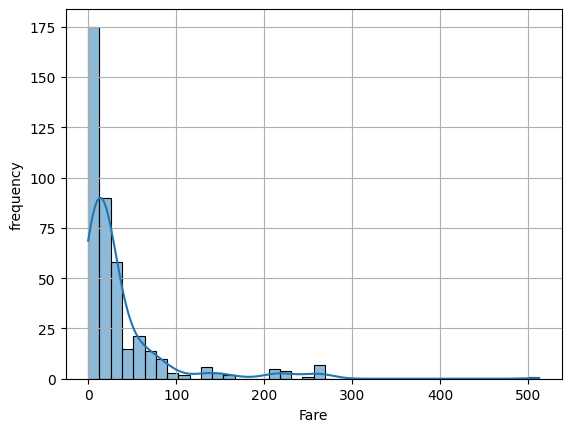

In [ ]:

sns.histplot(dt['Fare'],bins=40,kde=True,fill=True)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.grid(True)
plt.show()


In [ ]:

dt["Fare"] = np.log1p(dt["Fare"])
dt["Fare"].skew()

np.float64(0.8621677993028872)

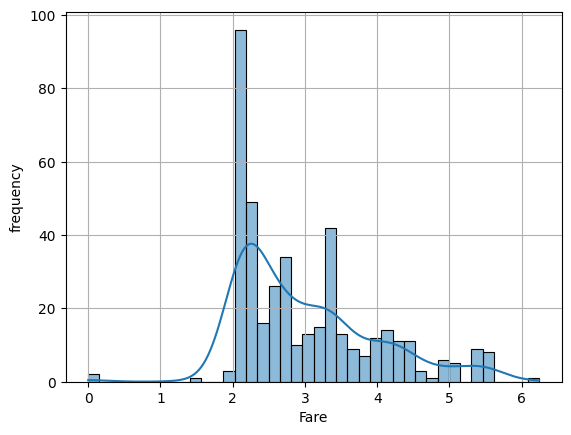

In [ ]:

sns.histplot(dt['Fare'],bins=40,kde=True,fill=True)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

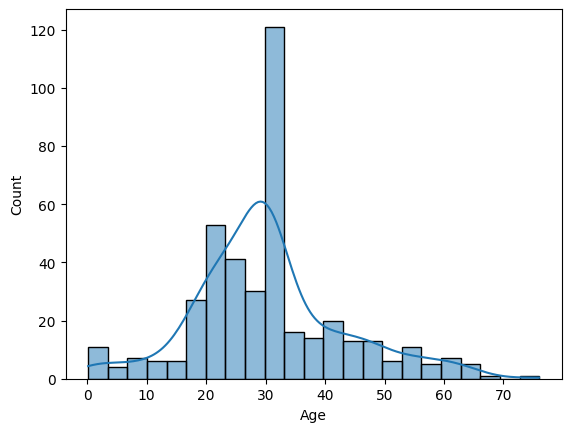

In [ ]:
sns.histplot(dt["Age"],kde=True,fill=True)
plt.show()

In [ ]:
for i in ["Age","Fare"]:
    Q1 = dt[i].quantile(0.25)
    Q3 = dt[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    dt = dt[(dt[i]>=lower)&(dt[i]<=upper)]


In [ ]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,2.178064,0
1,1,3,0,47.0,1,0,2.079442,1
3,0,3,1,27.0,0,0,2.268252,1
4,1,3,0,22.0,1,1,2.586824,1
5,0,3,1,14.0,0,0,2.324836,1


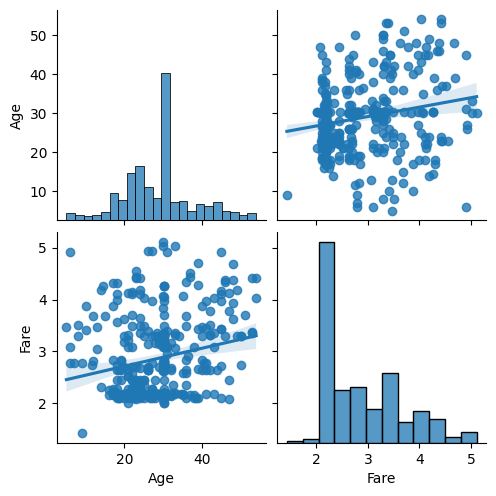

In [ ]:
sns.pairplot(data=dt,kind='reg',vars=['Age','Fare'])
plt.grid(True)
plt.show()

In [ ]:
corr_mat = dt.corr()

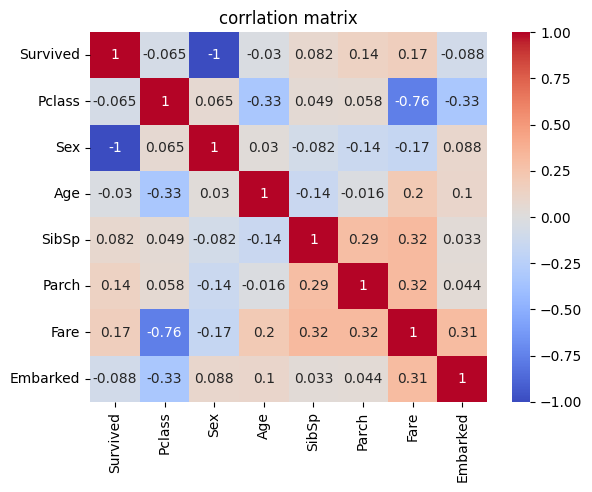

In [ ]:
plt.title("corrlation matrix")
sns.heatmap(data=corr_mat,annot=True,vmax=1,vmin=-1,cmap='coolwarm')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(dt.drop('Survived',axis=1),dt['Survived'],test_size=0.2,random_state=41)


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,pred)
conf = confusion_matrix(y_test,pred)
f1 = f1_score(y_test,pred)



In [ ]:
print("accuracy is :",acc)
print("confusion matrix:",conf)
print("f1 score is :",f1)

accuracy is : 1.0
confusion matrix: [[45  0]
 [ 0 29]]
f1 score is : 1.0
